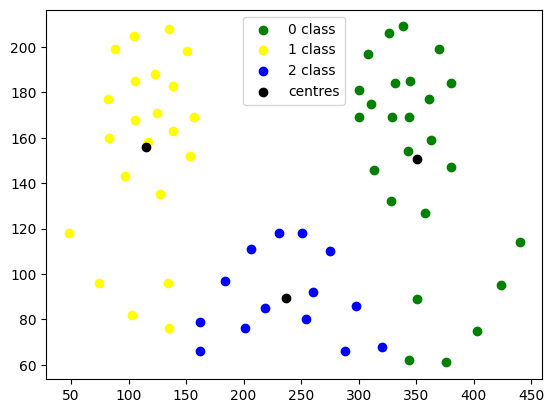

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

data_x = [(48, 118), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]

M = np.mean(data_x, axis=0) # each coordinate mean value
D = np.var(data_x, axis=0) # each coordinate dispersion (2,)
K = 3 # num of clusters
ma = [np.random.normal(M, np.sqrt(D / 10), 2) for n in range(K)] # задаем 3 случайных центра класса с помощью МО, Дисперсии и числа кластеров



def metric(x1, x2):
    return np.mean(abs(x1 - x2))

n = 0
while n < 10:
    X = [[] for _ in range(K)]

    for xv in data_x:
        r = [metric(xv, centres) for centres in ma]
        X[np.argmin(r)].append(xv) # добавляем в Х[индекс ближайшего центра] xv
    
    ma= [np.mean(xx, axis=0) for xx in X]
    n+=1

colors = ('green', 'yellow', 'blue', 'black')

for j in range(K):
    xx, yy = [], []
    for x in X[j]:
        xx.append(x[0]), yy.append(x[1])
    plt.scatter(xx, yy, c=colors[j], label=f'{j} class')

mx, my = [m[0] for m in ma], [m[1] for m in ma]
plt.scatter(mx, my, c=colors[-1], label='centres')
plt.legend()


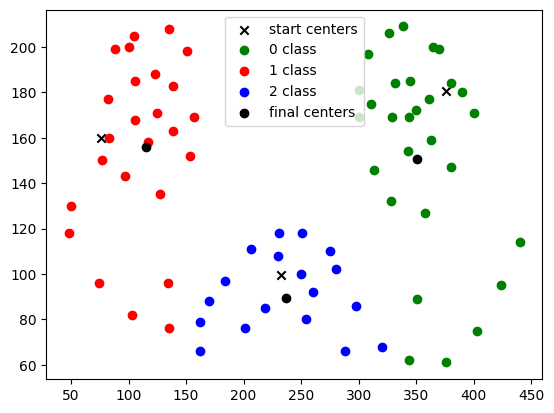

In [2]:
import numpy as np
import matplotlib.pyplot as plt

T = [[(365, 200), (390, 180), (350, 172), (400, 171)], [(77, 150), (100, 200), (50, 130)], [(250, 100), (170, 88), (280, 102), (230, 108)]]
data_x = [(48, 118), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]

K = 3    # число кластеров

def metric(x1, x2):
    return np.mean((x1-x2)**2)


# define centres as centres of T
centers = [np.mean(x, axis=0) for x in T]
# visualisation of centers
cx, cy = [x[0] for x in centers], [x[1] for x in centers]
plt.scatter(cx, cy, c='black', marker='x', label='start centers')

for _ in range(10):
    X = [[] for k in range(K)] #T.copy() # add T-values (start) in cluster
    for x in data_x:
        m = [[metric(x, cent)] for cent in centers]
        X[np.argmin(m)].append(x)
    centers = [np.mean(xx, axis=0) for xx in X]

# add T-values (start) in cluster
# если добавить Т изначально в Х, то кластеризация немного изменится, т.к. центры будут перерасчитыватья с учетом Т
for i, x in enumerate(T):
    for sub_x in x:
        X[i].append(sub_x)

# visualisation
colors = ('green', 'red', 'blue')
for j in range(K):
    xx, yy = [], []
    for x in X[j]:
        xx.append(x[0]), yy.append(x[1])
    plt.scatter(xx, yy, c=colors[j], label=f'{j} class')

cx, cy = [x[0] for x in centers], [x[1] for x in centers]
plt.scatter(cx, cy, c='black', label='final centers')
plt.legend()